In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from yellowbrick.target import FeatureCorrelation
from collections import defaultdict

In [21]:
tracks = pd.read_csv('../spotify_data.csv')
tracks['genre'] = tracks['genre'].str.strip().str.lower()

In [22]:
tracks.drop_duplicates(subset=['track_name', 'artist_name'], inplace=True)
tracks.dropna()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,El Michels Affair,Incarcerated Scarfaces,1hMySkyDeV8BDayCv3wqVm,32,2012,afrobeat,0.760,0.494,11,-9.391,1,0.0420,0.0184,0.828000,0.1020,0.270,90.258,100493,4
996,996,El Michels Affair,Protect Ya Neck,1ZhovLmj7HALLd7mhKZFlt,32,2012,afrobeat,0.801,0.779,9,-8.236,1,0.0458,0.0161,0.877000,0.0923,0.273,110.966,212867,4
997,997,The Ogyatanaa Show Band,You Monopolise Me,1FHBkS8AEvnXdXLD9ioUXy,28,2012,afrobeat,0.776,0.554,9,-6.865,1,0.2230,0.2760,0.000000,0.2780,0.719,95.482,194427,4
998,998,Monophonics,Say You Love Me,0umIVhGxcIrwF21ItkFWzY,38,2012,afrobeat,0.703,0.427,9,-8.319,0,0.0424,0.5700,0.000061,0.1370,0.769,89.899,262280,4


In [23]:
# features for clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_ms', 'time_signature']

#### Feature correlation with popularity

/Users/aarushagrawal/.pyenv/versions/3.11.9/lib/python3.11/site-packages/yellowbrick/target/feature_correlation.py:174: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



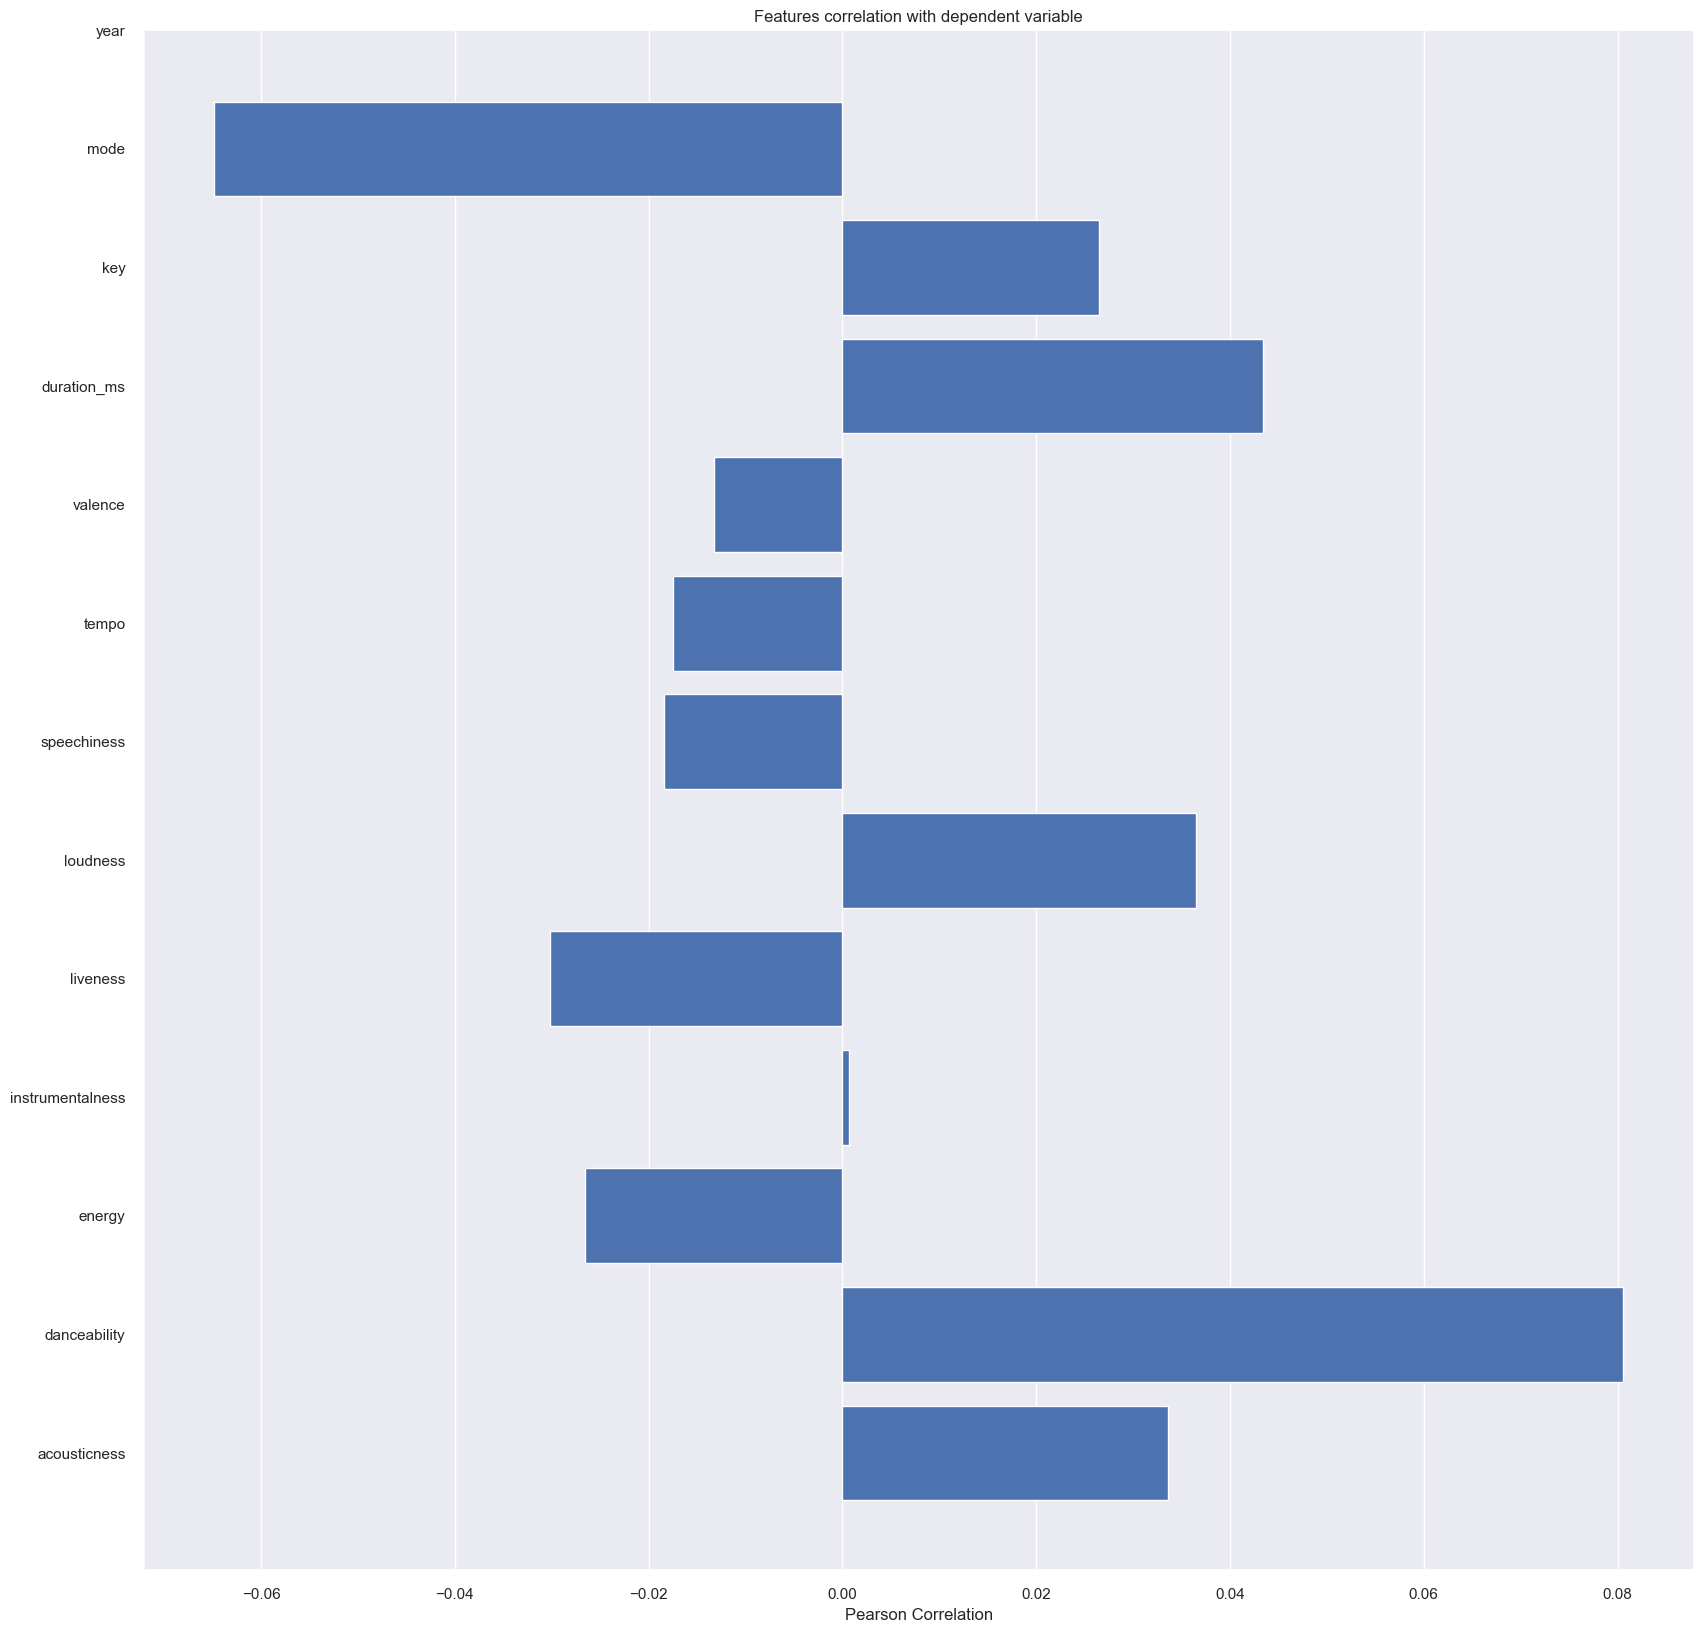

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [24]:
numericFeatures = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'key', 'mode', 'year']
X, y = tracks[numericFeatures], tracks['popularity']

features = np.array(numericFeatures)
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)
visualizer.show()

#### Music over time

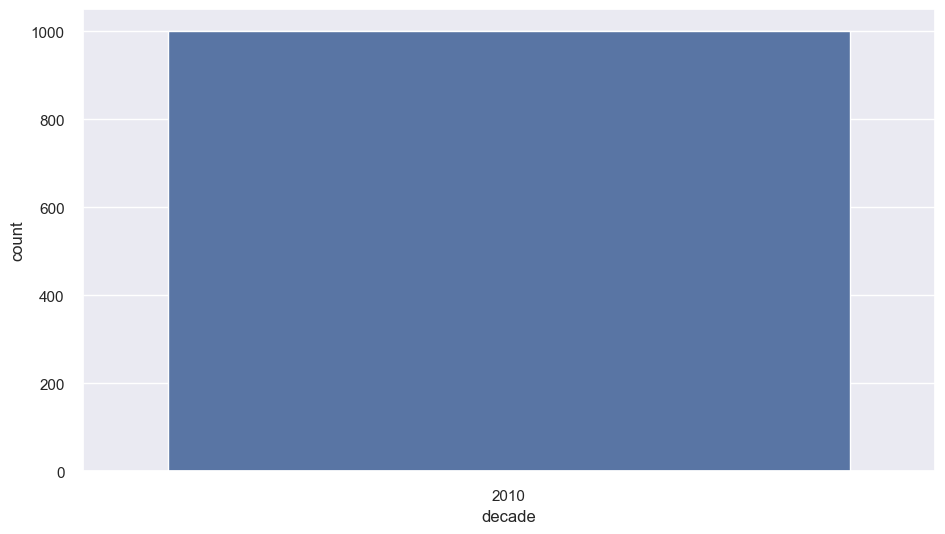

In [25]:
def getDecade(year):
    decade = int(year / 10) * 10
    return decade

tracks['decade'] = tracks['year'].apply(getDecade)


sns.set(rc={'figure.figsize':(11,6)})
sns.countplot(x='decade', data=tracks)

plt.show()

In [26]:
# sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
# fig = px.line(tracks, x='year', y=sound_features)
# fig.show()

In [27]:
mean_metrics = tracks.nlargest(10, 'popularity')[['genre', 'valence', 'energy', 'danceability', 'acousticness']].groupby('genre').mean().reset_index()

fig = px.bar(mean_metrics, x='genre', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title="Average Metrics for Top 3 Genres")
fig.update_layout(yaxis_title="Metrics", xaxis_title="Genre", legend_title="Metrics")
fig.show()

In [28]:
# standardize feature cols
scaler = StandardScaler()
scaledTracks = scaler.fit_transform(tracks[features])

In [29]:
kmeans = KMeans(n_clusters=10, random_state=42)
tracks['cluster'] = kmeans.fit_predict(scaledTracks)

print(tracks.head())

   Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   
3           3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz   
4           4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8   

   popularity  year     genre  danceability  energy  key  ...  speechiness  \
0          68  2012  acoustic         0.483   0.303    4  ...       0.0429   
1          50  2012  acoustic         0.572   0.454    3  ...       0.0258   
2          57  2012  acoustic         0.409   0.234    3  ...       0.0323   
3          58  2012  acoustic         0.392   0.251   10  ...       0.0363   
4          54  2012  acoustic         0.430   0.791    6  ...       0.0302   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       

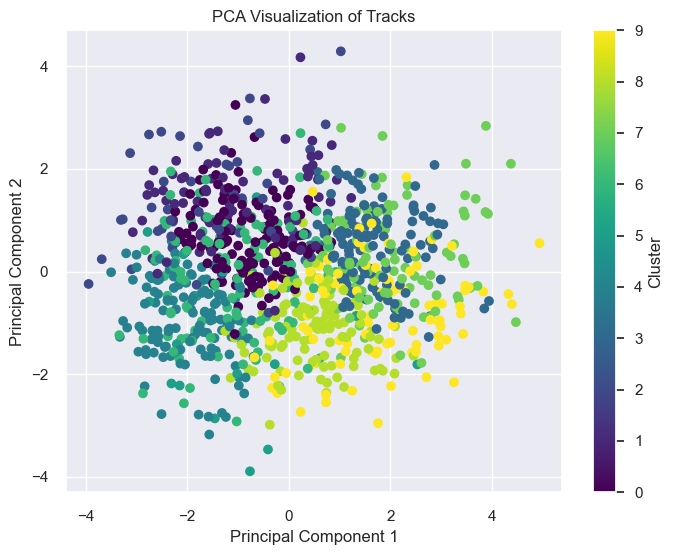

In [30]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaledTracks)

Df = pd.DataFrame(data=principalComponents,
                           columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([Df, tracks[['cluster']]], axis=1)

plt.figure(figsize=(8,6))
plt.scatter(Df['principal component 1'], Df['principal component 2'], c=tracks['cluster'].values, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.title('PCA Visualization of Tracks')

plt.show()


In [31]:
clusterAnalysis = tracks.groupby('cluster')['genre'].unique()

# for cluster, genres in clusterAnalysis.items():
#     print(f"cluster {cluster}: {genres}")

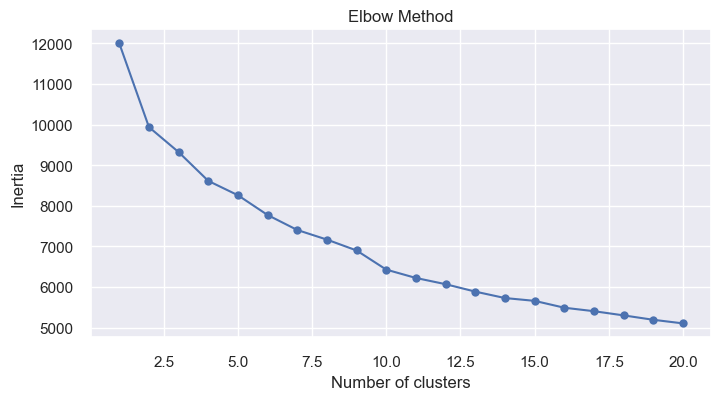

In [32]:
def find_optimal_clusters(data, features, max_k=20):
    scaled_data = scaler.fit_transform(data[features])
    inertia = []
    
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

find_optimal_clusters(tracks, features)

In [33]:
optimal_k = 16

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
scaledTracks = scaler.fit_transform(tracks[features])
tracks['cluster'] = kmeans.fit_predict(scaledTracks)

In [34]:
def calculate_clustering_metrics(tracks, kmeans):
    # print(features)
    # return tracks
    # Get the features and cluster labels
    X = tracks
    labels = kmeans.labels_

    # Calculate Silhouette Score
    silhouette = silhouette_score(X, labels)
    
    # Calculate Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(X, labels)
    
    # Calculate Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(X, labels)
    
    # Calculate average cosine similarity within clusters
    cosine_similarities = []
    for cluster in range(kmeans.n_clusters):
        cluster_points = X[labels == cluster]
        if len(cluster_points) > 1:
            similarity = cosine_similarity(cluster_points).mean()
            cosine_similarities.append(similarity)
    average_cosine_similarity = sum(cosine_similarities) / len(cosine_similarities)

    return {
        'silhouette_score': silhouette,
        'davies_bouldin_score': davies_bouldin,
        'calinski_harabasz_score': calinski_harabasz,
        'average_cosine_similarity': average_cosine_similarity
    }

# calculate clustering metrics
metrics = calculate_clustering_metrics(scaledTracks, kmeans)
print("Clustering Metrics:")
print(metrics)


Clustering Metrics:
{'silhouette_score': 0.11766656535139323, 'davies_bouldin_score': 1.7255342030086969, 'calinski_harabasz_score': 77.78917288373368, 'average_cosine_similarity': 0.5609633991124608}


In [35]:
def recommendSongs(inputTrackName, inputArtistName, tracks, features, scaler, kmeans, n_recommendations=10):
    inputTrackName = inputTrackName.strip().lower()
    inputArtistName = inputArtistName.strip().lower()
    
    # find input track
    inputTrack = tracks[(tracks['track_name'].str.lower() == inputTrackName) & (tracks['artist_name'].str.lower() == inputArtistName)]
    
    if inputTrack.empty:
        print("Track not found in dataset")
        return inputTrack 
    
    print("Input track found:")
    print(inputTrack)
    
    inputTrackFeatures = inputTrack[features]
    scaledInputTrackFeatures = scaler.transform(inputTrackFeatures)
    
    # predict cluster for the input track
    inputCluster = kmeans.predict(scaledInputTrackFeatures)[0]
    print(f"Predicted cluster: {inputCluster}")
    
    # get tracks from same cluster
    similarTracks = tracks[tracks['cluster'] == inputCluster]
    # exclude input track from recommendations
    similarTracks = similarTracks[(similarTracks['track_name'].str.lower() != inputTrackName) | (similarTracks['artist_name'].str.lower() != inputArtistName)]
    
    # drop duplicate tracks based on track_id
    similarTracks = similarTracks.drop_duplicates(subset='track_id')
    print("Number of duplicates in similarTracks:", similarTracks.duplicated().sum())
    
    # calculate the distances to input track
    similarTracksFeatures = scaler.transform(similarTracks[features])
    distances = euclidean_distances(scaledInputTrackFeatures, similarTracksFeatures).flatten()
    
    print("Length of distances:", len(distances))
    print("Length of similarTracks:", len(similarTracks))
    
    if len(distances) != len(similarTracks):
        print("Lengths of distances and similarTracks do not match. Skipping.")
        return pd.DataFrame()  # return an empty DataFrame if lengths don't match
    
    # add distances to similarTracks DataFrame
    similarTracks['distance'] = distances
    
    # sort by distance and select top n_recommendations
    recommendations = similarTracks.sort_values(by=['distance', 'popularity'], ascending=[True, False]).drop_duplicates(subset=['artist_name', 'track_name']).head(n_recommendations)

    if len(recommendations) < n_recommendations:
        # fill remaining recommendations with similar tracks if duplicates
        remaining = similarTracks[~similarTracks.index.isin(recommendations.index)].head(n_recommendations - len(recommendations))
        recommendations = pd.concat([recommendations, remaining])
    
    return recommendations[['artist_name', 'track_name', 'popularity', 'genre', 'year']]

Input track found:
     Unnamed: 0 artist_name          track_name                track_id  \
823         823  Tyler Ward  Gravity - Acoustic  19B1TZv0hG2iub0fZM4PS8   

     popularity  year     genre  danceability  energy  key  ...  speechiness  \
823          10  2012  acoustic         0.405  0.0532    7  ...       0.0494   

     acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
823         0.911          0.000003     0.108    0.275  164.736       215835   

     time_signature  decade  cluster  
823               4    2010        9  

[1 rows x 22 columns]
Predicted cluster: 9
Number of duplicates in similarTracks: 0
Length of distances: 65
Length of similarTracks: 65
Input track found:
     Unnamed: 0        artist_name       track_name                track_id  \
999         999  El Michels Affair  Glaciers Of Ice  2XGIZ53jLzPcTVOzoRVetm   

     popularity  year     genre  danceability  energy  key  ...  speechiness  \
999          31  2012  afrobeat    

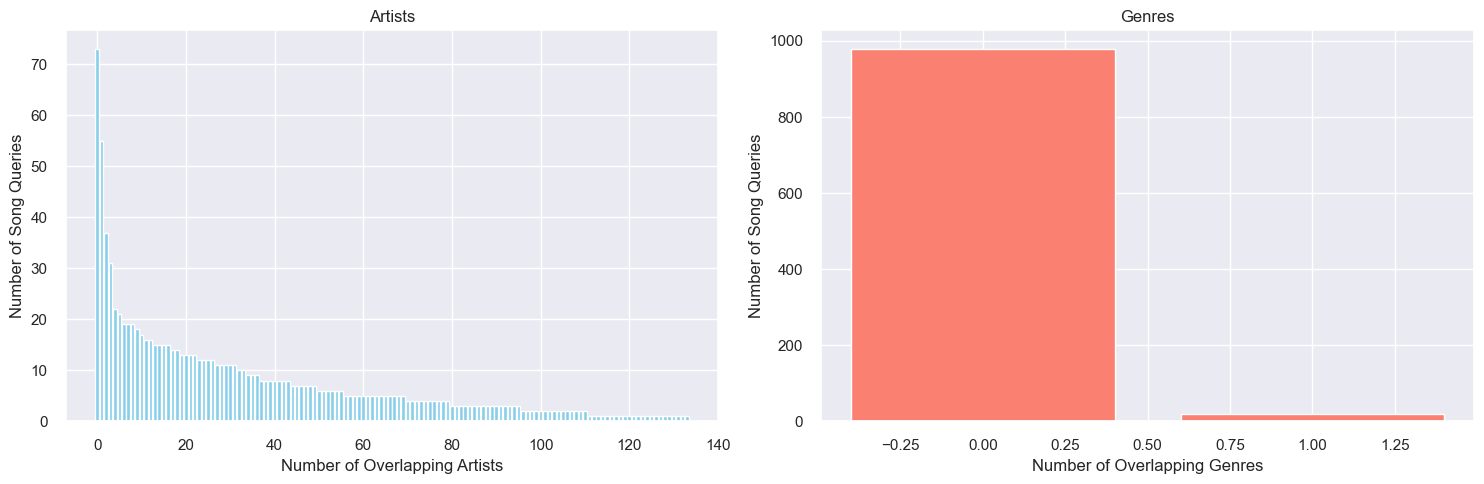

In [36]:
np.random.seed(69)
random_indices = np.random.choice(tracks.index, size=100, replace=False)
random_queries = tracks.iloc[random_indices]
all_artists = defaultdict(int)
all_genres = defaultdict(int)

for idx, row in random_queries.iterrows():
    inputTrackName = row['track_name']
    inputArtistName = row['artist_name']
    recommendations = recommendSongs(inputTrackName, inputArtistName, tracks, features, scaler, kmeans)
    
    if recommendations.empty:
        continue
    
    for idx, recommendation in recommendations.iterrows():
        artist = recommendation['artist_name']
        genre = recommendation['genre']
        all_artists[artist] += 1
        all_genres[genre] += 1

artists_df = pd.DataFrame(list(all_artists.items()), columns=['Artist', 'Count']).sort_values(by='Count', ascending=False)
genres_df = pd.DataFrame(list(all_genres.items()), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.bar(range(len(genres_df)), genres_df['Count'], color='salmon')
plt.xlabel('Number of Overlapping Genres')
plt.ylabel('Number of Song Queries')
plt.title('Genres')
plt.subplot(1, 2, 1)
plt.bar(range(len(artists_df)), artists_df['Count'], color='skyblue')
plt.xlabel('Number of Overlapping Artists')
plt.ylabel('Number of Song Queries')
plt.title('Artists')

plt.tight_layout()
plt.show()